In [3]:
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


In [4]:
with open('credit.pkl', 'rb') as f:
    X_credit_treino, y_credit_treino, X_credit_teste, y_credit_teste = pickle.load(f)

with open('census.pkl', 'rb') as f:
    X_census_treino, y_census_treino, X_census_teste, y_census_teste = pickle.load(f)

In [13]:
rede_neural_credit = MLPClassifier(max_iter = 1500, verbose = True, tol = 0.0000100, hidden_layer_sizes = (2,2),
                                   solver = 'adam', activation = 'relu')

rede_neural_credit.fit(X_credit_treino, y_credit_treino)

Iteration 1, loss = 0.62448699
Iteration 2, loss = 0.61804677
Iteration 3, loss = 0.61174128
Iteration 4, loss = 0.60545028
Iteration 5, loss = 0.59944283
Iteration 6, loss = 0.59349165
Iteration 7, loss = 0.58775495
Iteration 8, loss = 0.58215447
Iteration 9, loss = 0.57657844
Iteration 10, loss = 0.57122739
Iteration 11, loss = 0.56590287
Iteration 12, loss = 0.56075965
Iteration 13, loss = 0.55579075
Iteration 14, loss = 0.55085416
Iteration 15, loss = 0.54612491
Iteration 16, loss = 0.54153222
Iteration 17, loss = 0.53698366
Iteration 18, loss = 0.53261432
Iteration 19, loss = 0.52829132
Iteration 20, loss = 0.52407161
Iteration 21, loss = 0.52001917
Iteration 22, loss = 0.51596368
Iteration 23, loss = 0.51209796
Iteration 24, loss = 0.50829963
Iteration 25, loss = 0.50457432
Iteration 26, loss = 0.50093477
Iteration 27, loss = 0.49747871
Iteration 28, loss = 0.49395928
Iteration 29, loss = 0.49054542
Iteration 30, loss = 0.48724807
Iteration 31, loss = 0.48404220
Iteration 32, los

C:\Users\MatheusM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [14]:
previsoes = rede_neural_credit.predict(X_credit_teste)

print(accuracy_score(y_credit_teste, previsoes))

0.998


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



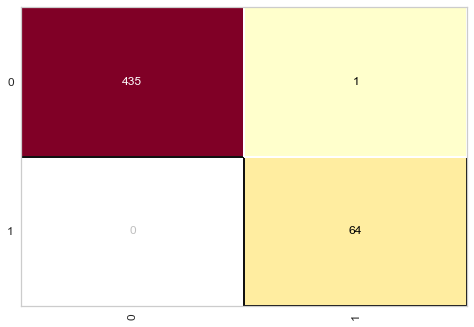

In [15]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treino, y_credit_treino)
cm.score(X_credit_teste,y_credit_teste)

print(classification_report(y_credit_teste, previsoes))

## Base de dados Census

In [19]:
rede_neural_census = MLPClassifier(hidden_layer_sizes=(55,55,55), solver = 'adam',
                                   max_iter=1500, verbose = True, activation='relu', tol = 1e-5)

rede_neural_census.fit(X_census_treino, y_census_treino)
previsoes = rede_neural_census.predict(X_census_teste)
print('\n')
print(accuracy_score(y_census_teste, previsoes))

Iteration 1, loss = 0.39514462
Iteration 2, loss = 0.32634055
Iteration 3, loss = 0.31396908
Iteration 4, loss = 0.30622878
Iteration 5, loss = 0.30209749
Iteration 6, loss = 0.29777933
Iteration 7, loss = 0.29441288
Iteration 8, loss = 0.29034811
Iteration 9, loss = 0.28788947
Iteration 10, loss = 0.28477993
Iteration 11, loss = 0.28220661
Iteration 12, loss = 0.28001642
Iteration 13, loss = 0.27704252
Iteration 14, loss = 0.27423943
Iteration 15, loss = 0.27198893
Iteration 16, loss = 0.26978936
Iteration 17, loss = 0.26754264
Iteration 18, loss = 0.26589593
Iteration 19, loss = 0.26422162
Iteration 20, loss = 0.26103154
Iteration 21, loss = 0.25792003
Iteration 22, loss = 0.25589236
Iteration 23, loss = 0.25384189
Iteration 24, loss = 0.25173602
Iteration 25, loss = 0.24947271
Iteration 26, loss = 0.24623043
Iteration 27, loss = 0.24508739
Iteration 28, loss = 0.24371840
Iteration 29, loss = 0.24186135
Iteration 30, loss = 0.24016468
Iteration 31, loss = 0.23742411
Iteration 32, los

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      3693
        >50K       0.63      0.61      0.62      1192

    accuracy                           0.82      4885
   macro avg       0.75      0.75      0.75      4885
weighted avg       0.82      0.82      0.82      4885



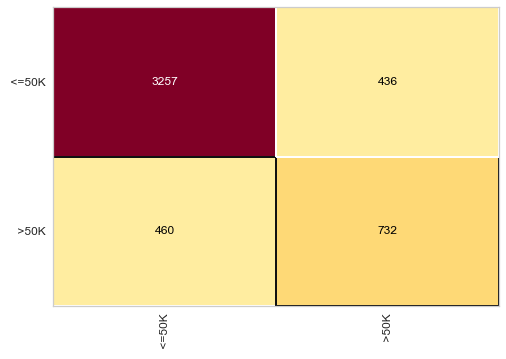

In [20]:
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treino, y_census_treino)
cm.score(X_census_teste, y_census_teste)

print(classification_report(y_census_teste, previsoes))